## Plot the landscape under current conditions

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


In [39]:
# open the file
df = pd.read_csv('resilience_landscape.csv').drop(['Unnamed: 0'], axis=1)

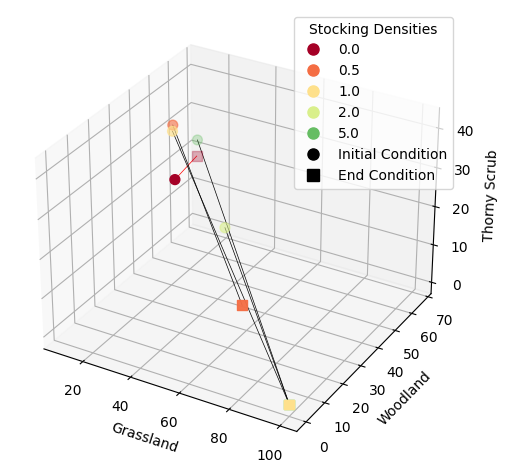

In [41]:
# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define colors based on stocking density
stocking_density_colors = plt.cm.get_cmap('RdYlGn', 6)  # 6 colors for 0-5 stocking density
stocking_density_color_mapping = {0: 0.0, 0.5: 0.2, 1: 0.4, 2: 0.6, 5: 0.8}

# Define marker shapes for initial and end conditions
initial_marker = 'o'
end_marker = 's'

# Scatter plot for initial conditions
initial_color = [stocking_density_colors(stocking_density_color_mapping[density]) for density in df['Stocking Density']]
initial_scatter = ax.scatter(df['Grassland Initial'], df['Woodland Initial'], df['Thorny Scrub Initial'], c=initial_color, marker=initial_marker, s=50)

# Scatter plot for end conditions

end_color = [stocking_density_colors(stocking_density_color_mapping[density]) for density in df['Stocking Density']]
end_scatter = ax.scatter(df['Grassland End'], df['Woodland End'], df['Thorny Scrub End'], c=end_color, marker=end_marker, s=50)

# Connect points with lines - plot the "true" run as red:
for i in range(len(df)):
    if df['Run Number'][i] == 1:  # Selecting run number 5
        ax.plot([df['Grassland Initial'][i], df['Grassland End'][i]],
                [df['Woodland Initial'][i], df['Woodland End'][i]],
                [df['Thorny Scrub Initial'][i], df['Thorny Scrub End'][i]], c='red', linewidth=0.5)
    else:
        ax.plot([df['Grassland Initial'][i], df['Grassland End'][i]],
                [df['Woodland Initial'][i], df['Woodland End'][i]],
                [df['Thorny Scrub Initial'][i], df['Thorny Scrub End'][i]], c='black', linewidth=0.5)

# Set labels
ax.set_xlabel('Grassland')
ax.set_ylabel('Woodland')
ax.set_zlabel('Thorny Scrub')

# Create custom legend
stocking_density_labels = df['Stocking Density'].unique()
stocking_density_handles = []
for density in stocking_density_labels:
    stocking_density_handles.append(plt.Line2D([], [], color=stocking_density_colors(stocking_density_color_mapping[density]), marker='o', linestyle='None', markersize=8, label=str(density)))

# Add legend for initial and end conditions
legend_handles = stocking_density_handles + [plt.Line2D([], [], color='black', marker=initial_marker, linestyle='None', markersize=8, label='Initial Condition'),
                                             plt.Line2D([], [], color='black', marker=end_marker, linestyle='None', markersize=8, label='End Condition')]

ax.legend(handles=legend_handles, title='Stocking Densities')

plt.tight_layout()
# Show the plot
plt.show()
